# With TF

In [71]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [66]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# rescale the images
X_train_full= X_train_full / 255
X_test= X_test / 255

# split to train val test
n_val= 10_000
X_val= X_train_full[:n_val].copy()
y_val= y_train_full[:n_val].copy()
X_train= X_train_full[n_val:].copy()
y_train= y_train_full[n_val:].copy()

# encode the label
encoder= OneHotEncoder(sparse_output= False, drop= None, 
                       handle_unknown= 'ignore')

encoder.fit(y_train.reshape(-1, 1))
y_train= encoder.transform(y_train.reshape(-1, 1))
y_val= encoder.transform(y_val.reshape(-1, 1))
y_test= encoder.transform(y_test.reshape(-1, 1))

In [68]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [69]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000, 10)
(10000, 28, 28) (10000, 10)
(10000, 28, 28) (10000, 10)


In [46]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
model= keras.Sequential()

# conv1
model.add(Conv2D(filters= 32, 
                 kernel_size= (3, 3),
                 strides= 1, 
                 padding= 'same', 
                 activation= 'relu', 
                 # only need to specify input shape here
                 input_shape= (28, 28, 1))) 
model.add(MaxPooling2D(pool_size= (2, 2)))

# conv 2
model.add(Conv2D(filters= 64, 
                 kernel_size= (3, 3),
                 strides= 1, 
                 padding= 'same', 
                 activation= 'relu',))
model.add(MaxPooling2D(pool_size= (2, 2)))

# fully connected layers
model.add(Flatten())
model.add(Dropout(rate= 0.3))
model.add(Dense(units= 64, activation='relu'))
model.add(Dropout(rate= 0.5))
model.add(Dense(units= 10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3136)             

In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer= 'rmsprop', 
              metrics= ['accuracy'])

In [72]:
hist= model.fit(x= X_train, 
                y= y_train,
                batch_size= 32, 
                epochs= 10, 
                validation_data= (X_val, y_val),
                verbose= 1, 
                shuffle= True)

Epoch 1/10


/home/anj/miniconda3/envs/deep-learning/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1563/1563 [==============================] - 58s 37ms/step - loss: 0.2907 - accuracy: 0.9112 - val_loss: 0.0736 - val_accuracy: 0.9795
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.1167 - accuracy: 0.9655 - val_loss: 0.0757 - val_accuracy: 0.9815
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0983 - accuracy: 0.9732 - val_loss: 0.0593 - val_accuracy: 0.9822
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0884 - accuracy: 0.9751 - val_loss: 0.0731 - val_accuracy: 0.9811
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0881 - accuracy: 0.9758 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0905 - accuracy: 0.9748 - val_loss: 0.0663 - val_accuracy: 0.9833
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0945 - accuracy: 0.9750 - val_loss: 0.0567 - val_accura

In [77]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

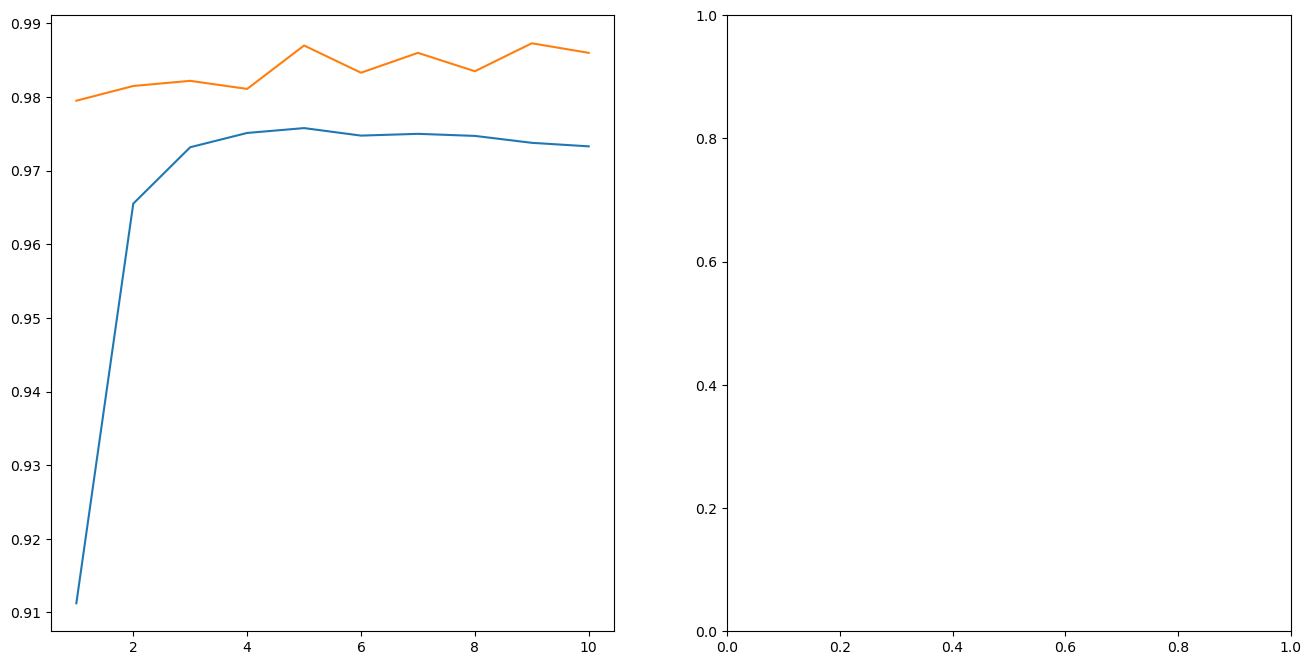

In [87]:
train_acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']
epochs= list(range(1, len(train_acc) + 1))

import matplotlib.pyplot as plt

fig, axs= plt.subplots(ncols= 2, figsize=(16, 8))
axs[0].plot(epochs, train_acc)
axs[0].plot(epochs, val_acc)

plt.show()